# Hannah Garrett
## Final Project - COVID 19 Outcomes
### DS-160-01

#### Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Import dataset

In [2]:
dataset=pd.read_csv("COVID-19_CBC_Data.csv")
dataset.head()

,Admission_DATE,Discharge_DATE or date of Death,Outcome,Patient Age,Gender,Sample Collection Date,What kind of Treatment provided,Ventilated (Y/N),Red blood cell distribution width,Monocytes(%),White blood cell count,Platelet Count,Lymphocyte Count,Neutrophils Count
0,8/10/20,8/8/20,Not Recovered,51,Male,8/10/20,"antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43
1,7/24/20,8/5/20,Not Recovered,65,Female,7/24/20,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56
2,7/22/20,8/8/20,Recovered,32,Male,7/22/20,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34
3,7/19/20,8/5/20,Recovered,36,Female,7/19/20,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66
4,7/18/20,8/5/20,Recovered,46,Male,7/18/20,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Admission_DATE                     309 non-null    object 
 1   Discharge_DATE or date of Death    309 non-null    object 
 2   Outcome                            309 non-null    object 
 3   Patient Age                        309 non-null    int64  
 4   Gender                             309 non-null    object 
 5   Sample Collection Date             309 non-null    object 
 6   What kind of Treatment provided    309 non-null    object 
 7   Ventilated (Y/N)                   309 non-null    object 
 8   Red blood cell distribution width  309 non-null    float64
 9   Monocytes(%)                       309 non-null    float64
 10  White blood cell count             309 non-null    float64
 11  Platelet Count                     309 non-null    float64

#### Cleaning the dataset

In [4]:
#Renaming columns
dataset=dataset.rename(columns={'Admission_DATE ': 'a_date', 'Discharge_DATE or date of Death' : 'd_date', 'Outcome':'outcome',
       'Patient Age':'patient_age', 'Gender':'gender', 'Sample Collection Date ':'collection_date',
       'What kind of Treatment provided ':'treatment', 'Ventilated (Y/N)':'ventilated',
       'Red blood cell distribution width':'rbc_dis', 'Monocytes(%)':'monocytes',
       'White blood cell count':'wbc_count', 'Platelet Count':'plate_count', 'Lymphocyte Count':'lymph_count',
       'Neutrophils Count':'neut_count'})
dataset.head()

,a_date,d_date,outcome,patient_age,gender,collection_date,treatment,ventilated,rbc_dis,monocytes,wbc_count,plate_count,lymph_count,neut_count
0,8/10/20,8/8/20,Not Recovered,51,Male,8/10/20,"antibiotics, O2",Yes,13.2,3.3,21.00,462.00,0.44,19.43
1,7/24/20,8/5/20,Not Recovered,65,Female,7/24/20,"Paracetamol, Antibiotics, O2",Yes,40.0,3.0,8.79,180.66,4.39,7.56
2,7/22/20,8/8/20,Recovered,32,Male,7/22/20,"Antibiotics, O2",No,11.7,5.3,9.90,336.00,3.47,5.34
3,7/19/20,8/5/20,Recovered,36,Female,7/19/20,"Antibiotics, O2",No,13.0,5.0,9.95,240.10,0.80,8.66
4,7/18/20,8/5/20,Recovered,46,Male,7/18/20,"Paracetamol, Antibiotics, O2",No,31.0,3.0,14.15,236.58,7.93,13.02


In [5]:
dataset=dataset.drop(['a_date','d_date','collection_date','treatment'], axis=1)
dataset.head()

,outcome,patient_age,gender,ventilated,rbc_dis,monocytes,wbc_count,plate_count,lymph_count,neut_count
0,Not Recovered,51,Male,Yes,13.2,3.3,21.00,462.00,0.44,19.43
1,Not Recovered,65,Female,Yes,40.0,3.0,8.79,180.66,4.39,7.56
2,Recovered,32,Male,No,11.7,5.3,9.90,336.00,3.47,5.34
3,Recovered,36,Female,No,13.0,5.0,9.95,240.10,0.80,8.66
4,Recovered,46,Male,No,31.0,3.0,14.15,236.58,7.93,13.02


In [6]:
dataset.isnull().sum()
#no null values

outcome        0
patient_age    0
gender         0
ventilated     0
rbc_dis        0
monocytes      0
wbc_count      0
plate_count    0
lymph_count    0
neut_count     0
dtype: int64

#### Splitting data into independent and dependent variables

In [7]:
dataset.columns

Index(['outcome', 'patient_age', 'gender', 'ventilated', 'rbc_dis',
       'monocytes', 'wbc_count', 'plate_count', 'lymph_count', 'neut_count'],
      dtype='object')

In [8]:
X=dataset[['patient_age', 'gender', 'ventilated', 'rbc_dis',
       'monocytes', 'wbc_count', 'plate_count', 'lymph_count', 'neut_count']]
y=dataset[['outcome']]

In [9]:
y

,outcome
0,Not Recovered
1,Not Recovered
2,Recovered
3,Recovered
4,Recovered
...,...
304,Recovered
305,Recovered
306,Recovered
307,Recovered


#### Encoding Categorical Data

In [10]:
X=pd.get_dummies(X, columns=["gender","ventilated"], drop_first=True)

In [11]:
X.head()

,patient_age,rbc_dis,monocytes,wbc_count,plate_count,lymph_count,neut_count,gender_Male,ventilated_Yes
0,51,13.2,3.3,21.00,462.00,0.44,19.43,1,1
1,65,40.0,3.0,8.79,180.66,4.39,7.56,0,1
2,32,11.7,5.3,9.90,336.00,3.47,5.34,1,0
3,36,13.0,5.0,9.95,240.10,0.80,8.66,0,0
4,46,31.0,3.0,14.15,236.58,7.93,13.02,1,0


#### Splitting data into training and test sets

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,
                                                 test_size=.2,
                                                 random_state=50)
X_test, X_val, y_test, y_val=train_test_split(X_test, y_test, test_size=.50, random_state=50)

#### Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())

LogisticRegression(max_iter=1000)

In [14]:
y_pred=classifier.predict(X_test.values)

In [15]:
score = classifier.score(X_test.values, y_test)
print("Score is", score)

Score is 0.9354838709677419


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=50)
X_test, X_val, y_test, y_val     = train_test_split(X_test, y_test, test_size=.40, random_state=50)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())
score1 = classifier.score(X_test.values, y_test)
print("Score is", score1)

Score is 0.9459459459459459


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=50)
X_test, X_val, y_test, y_val     = train_test_split(X_test, y_test, test_size=.50, random_state=50)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())
score2 = classifier.score(X_test.values, y_test)
print("Score is", score2)

Score is 0.9782608695652174


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=50)
X_test, X_val, y_test, y_val     = train_test_split(X_test, y_test, test_size=.40, random_state=50)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train.values, y_train.values.ravel())
score3 = classifier.score(X_test.values, y_test)
print("Score is", score3)

Score is 0.9818181818181818


In [19]:
print("Coefficients", classifier.coef_)
print("Intercept", classifier.intercept_)

Coefficients [[-0.04824655 -0.07360523 -0.42731959  0.0864592   0.03462343  0.55138387
  -0.85397607 -0.7148422  -4.14369041]]
Intercept [6.11008906]


#### Results

In [20]:
X_test.head()

,patient_age,rbc_dis,monocytes,wbc_count,plate_count,lymph_count,neut_count,gender_Male,ventilated_Yes
173,71,73.0,4.0,7.40,170.90,3.70,6.14,0,1
20,68,13.2,3.3,21.00,462.00,0.44,19.43,1,1
127,63,65.0,3.0,13.03,269.72,5.47,12.37,1,1
39,48,23.0,3.0,12.56,252.79,7.28,11.68,0,0
238,65,16.8,5.8,9.00,225.00,1.29,6.56,1,1


In [21]:
y_pred = classifier.predict(X_test.values)

# Convert 2D array to 1D so we can use a dataframe to view results
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)


pred_view = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
pred_view.head(10)

,Actual,Predicted
0,Not Recovered,Not Recovered
1,Not Recovered,Not Recovered
2,Not Recovered,Not Recovered
3,Recovered,Recovered
4,Not Recovered,Not Recovered
5,Not Recovered,Not Recovered
6,Recovered,Recovered
7,Recovered,Recovered
8,Not Recovered,Not Recovered
9,Recovered,Recovered


In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[20  0]
 [ 1 34]]


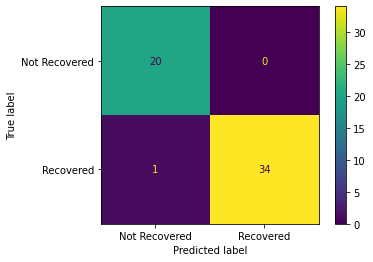

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
disp=ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=classifier.classes_)
disp.plot()
plt.show()

In [24]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred)
print(class_report)

               precision    recall  f1-score   support

Not Recovered       0.95      1.00      0.98        20
    Recovered       1.00      0.97      0.99        35

     accuracy                           0.98        55
    macro avg       0.98      0.99      0.98        55
 weighted avg       0.98      0.98      0.98        55

